In [1]:
# How - To: 3 Ways to Compare Histograms using OpenCV and Python
# SOURCE: https://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/
# This is how you apply histograms to calculate image similarity
# USAGE
# python similarity_histograms.py --image ../images/beach.png

# Import the necessary packages
import os
import argparse
import pathlib
from typing import Union, Any
from rich import inspect
from rich.color import Color

import cv2
import imutils
# Import the necessary packages
import numpy as np
from PIL import Image
from IPython.display import display
# Import the necessary packages
from matplotlib import pyplot as plt
from scipy.spatial import distance as dist
import glob

import argparse

from cv2 import cv2
from matplotlib import pyplot as plt
import numpy as np

# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,
#                 help="Path to the directory of images")
#args = vars(ap.parse_args())

args = {}

current_folder = pathlib.Path(f"/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/similarity")
print(current_folder)

# # Calculating path to the input data
dataset = pathlib.Path(f"{current_folder}").resolve()

print(dataset)

assert dataset.exists()

args["dataset"] = f"{current_folder}"



# initialize the index dictionary to store the image name
# and corresponding histograms and the images dictionary
# to store the images themselves
index = {}
images = {}





/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/similarity
/Users/malcolm/dev/bossjones/practical-python-and-opencv-case-studies/images/similarity


In [2]:
%load_ext rich

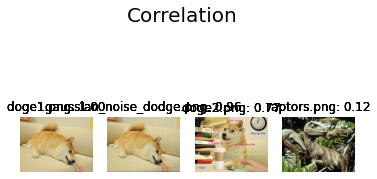

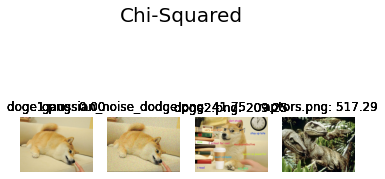

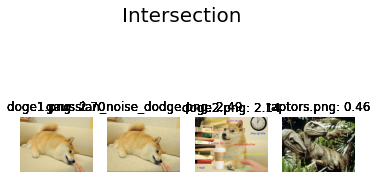

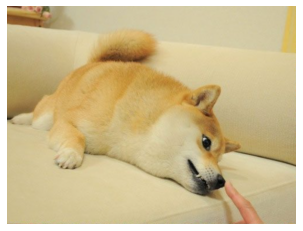

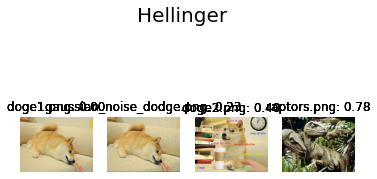

In [6]:
# loop over the image paths
for imagePath in glob.glob(args["dataset"] + "/*.png"):
    # extract the image filename (assumed to be unique) and
    # load the image, updating the images dictionary
    filename = imagePath[imagePath.rfind("/") + 1:]
    image = cv2.imread(imagePath)
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # extract a 3D RGB color histogram from the image,
    # using 8 bins per channel, normalize, and update
    # the index
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
                    [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    index[filename] = hist
    
    #     print(index)

    # Compare Histograms using OpenCV and Python
    # Method #1: Using the OpenCV cv2.compareHist function
    # initialize OpenCV methods for histogram comparison
    # ------------------------------------------
    # The cv2.compareHist function takes three arguments: H1, which is the first histogram to be compared, H2, the second histogram to be compared, and method, which is a flag indicating which comparison method should be performed.
    # The method flag can be any of the following:
    # cv2.HISTCMP_CORREL: Computes the correlation between the two histograms.
    # cv2.HISTCMP_CHISQR: Applies the Chi - Squared distance to the histograms.
    # cv2.HISTCMP_INTERSECT: Calculates the intersection between two histograms.
    # cv2.HISTCMP_BHATTACHARYYA: Bhattacharyya distance, used to measure the "overlap" between the two histograms.
    # Now it's time to apply the cv2.compareHist function to compare our color histograms:
    # ------------------------------------------
    # METHOD #1: UTILIZING OPENCV
    # initialize OpenCV methods for histogram comparison
    OPENCV_METHODS = (
        ("Correlation", cv2.HISTCMP_CORREL),
        ("Chi-Squared", cv2.HISTCMP_CHISQR),
        ("Intersection", cv2.HISTCMP_INTERSECT),
        ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))
    # loop over the comparison methods
    for (methodName, method) in OPENCV_METHODS:
        # initialize the results dictionary and the sort
        # direction
        results = {}
        reverse = False
        # if we are using the correlation or intersection
        # method, then sort the results in reverse order
        if methodName in ("Correlation", "Intersection"):
            reverse = True

        # loop over the index
        for (k, hist) in index.items():
            # compute the distance between the two histograms
            # using the method and update the results dictionary
            d = cv2.compareHist(index["doge1.png"], hist, method)
            results[k] = d
        # sort the results
        results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)

        # show the query image
        fig = plt.figure("Query")
        ax = fig.add_subplot(1, 1, 1)
        ax.imshow(images["doge1.png"])
        plt.axis("off")
        # initialize the results figure
        fig = plt.figure("Results: %s" % (methodName))
        fig.suptitle(methodName, fontsize = 20)
        # loop over the results
        for (i, (v, k)) in enumerate(results):
            # show the result
            ax = fig.add_subplot(1, len(images), i + 1)
            ax.set_title("%s: %.2f" % (k, v))
            plt.imshow(images[k])
            plt.axis("off")
# show the OpenCV methods
plt.show()